In [80]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [81]:
def generate_data(num_points, noise_std = 0.1):
    
    x_values = np.sort(np.random.uniform(0,2*np.pi, num_points))
    
    y_values = np.sin(x_values) + np.random.normal(0,noise_std,num_points)
    return x_values, y_values


num_points = 1000
x_train, y_train = generate_data(num_points, noise_std = 0.1)

Text(0, 0.5, 'Y values')

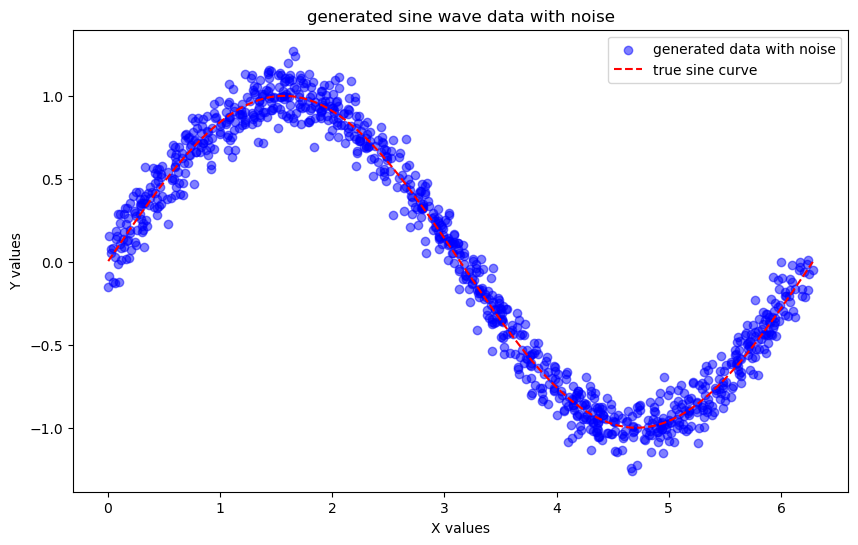

In [82]:
plt.figure(figsize=(10,6))

plt.scatter(x_train, y_train, label="generated data with noise", color='blue',alpha=0.5)

plt.plot(x_train, np.sin(x_train), label= "true sine curve", color='red', linestyle = '--')

plt.legend()

plt.title("generated sine wave data with noise")
plt.xlabel('X values')
plt.ylabel('Y values')

            

In [83]:
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1,10)
        self.activation = nn.SiLU()
        self.fc2 = nn.Linear(10,1)
        
    def forward(self,x):
        x = self.fc1(x)
        x=self.activation(x)
        x = self.fc2(x)
        return x

In [84]:
def get_optimizer(optim_name, model):
    if optim_name == "ADAM":
        return torch.optim.Adam(model.parameters())
    elif optim_name == "LBFGS":
        return torch.optim.LBFGS(model.parameters())
    else:
        raise ValueError("Unknown optimizer")

In [85]:
def train(model, optimizer, criterion, inputs, targets):
    def closure():
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        return loss
    
    optimizer.step(closure)
    return closure().item()



In [86]:
def evaluate(model, x_test):
    model.eval()
    with torch.no_grad():
        y_pred = model(x_test.view(-1,1)).numpy()
    return y_pred

In [87]:
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = get_optimizer('ADAM', model)

num_epochs = 10000

for epoch in range(num_epochs):
    inputs = torch.tensor(x_train, dtype=torch.float32, requires_grad=True).view(-1,1)
    targets = torch.tensor(y_train, dtype=torch.float32).view(-1,1)
    
    loss = train(model,optimizer, criterion, inputs, targets)
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')
    

Epoch [100/10000], Loss: 2.0819
Epoch [200/10000], Loss: 0.7451
Epoch [300/10000], Loss: 0.4011
Epoch [400/10000], Loss: 0.2833
Epoch [500/10000], Loss: 0.2252
Epoch [600/10000], Loss: 0.1955
Epoch [700/10000], Loss: 0.1797
Epoch [800/10000], Loss: 0.1691
Epoch [900/10000], Loss: 0.1595
Epoch [1000/10000], Loss: 0.1496
Epoch [1100/10000], Loss: 0.1390
Epoch [1200/10000], Loss: 0.1283
Epoch [1300/10000], Loss: 0.1179
Epoch [1400/10000], Loss: 0.1087
Epoch [1500/10000], Loss: 0.1012
Epoch [1600/10000], Loss: 0.0952
Epoch [1700/10000], Loss: 0.0902
Epoch [1800/10000], Loss: 0.0854
Epoch [1900/10000], Loss: 0.0809
Epoch [2000/10000], Loss: 0.0774
Epoch [2100/10000], Loss: 0.0745
Epoch [2200/10000], Loss: 0.0720
Epoch [2300/10000], Loss: 0.0698
Epoch [2400/10000], Loss: 0.0677
Epoch [2500/10000], Loss: 0.0657
Epoch [2600/10000], Loss: 0.0638
Epoch [2700/10000], Loss: 0.0618
Epoch [2800/10000], Loss: 0.0599
Epoch [2900/10000], Loss: 0.0580
Epoch [3000/10000], Loss: 0.0561
Epoch [3100/10000],

In [88]:
x_test = torch.linspace(0, 2*np.pi, 100)
y_pred = evaluate(model,x_test)

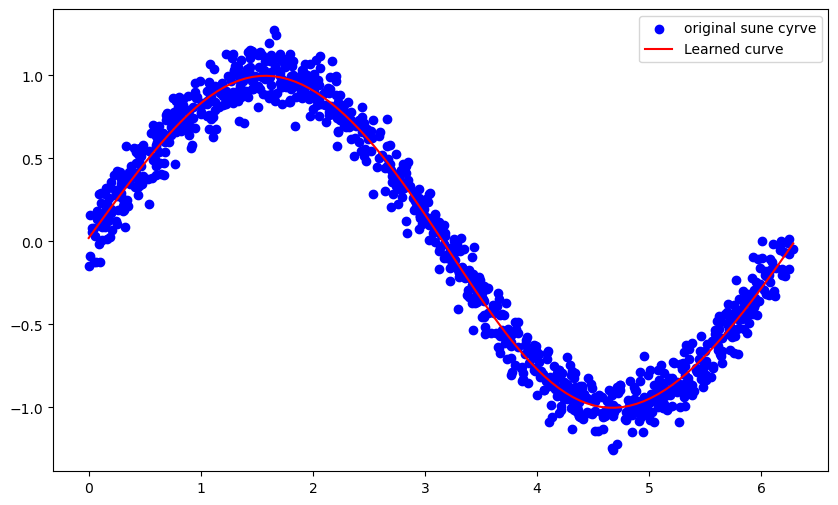

In [89]:
plt.figure(figsize=(10,6))
plt.scatter(x_train, y_train, label="original sune cyrve", color = "blue")
plt.plot(x_test, y_pred, label="Learned curve", color="red")
plt.legend()
plt.show()

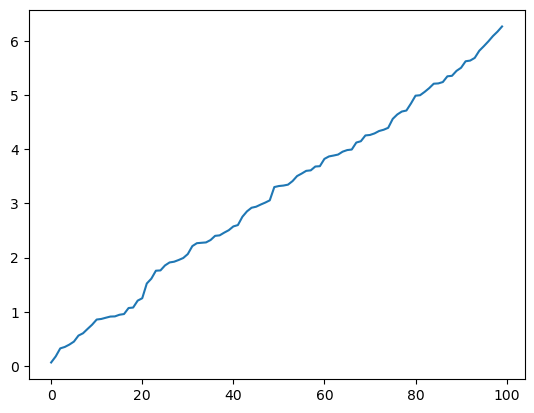

In [90]:
num_points = 100    
x_values = np.sort(np.random.uniform(0,2*np.pi, num_points))
x_values
plt.plot(x_values)

(100,)


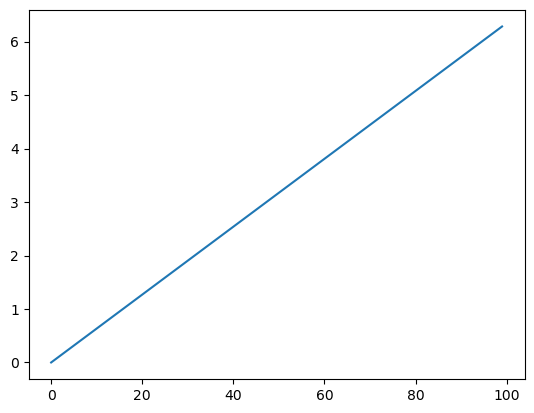

In [91]:
num_points = 100    
x_values = np.linspace(0, 2*np.pi, num_points)
x_values
plt.plot(x_values)
y_values = np.sin(x_values) 
print(y_values.shape)